<a href="https://colab.research.google.com/github/lkamimura/SimulacionDinamica/blob/main/Clase03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Equilibrio inestable del péndulo

Sea el diagrama del péndulo, extraído de [Sontag 1998](http://www.sontaglab.org/FTPDIR/sontag_mathematical_control_theory_springer98.pdf), http://www.sontaglab.org/publications.html.

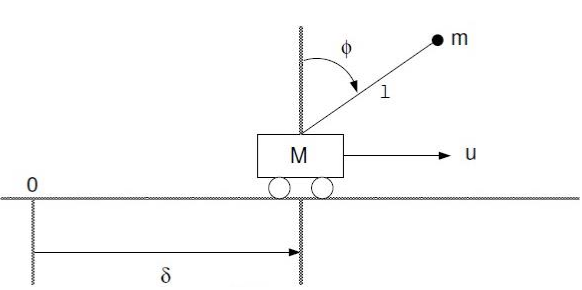

Para el caso de la linealización de sistemas dinámicos, el modelo mecánico del péndulo para cualquier ángulo $\phi$ se puede escribir como


<!-- $(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} \cdot
 cos (\phi) + m\cdot long \cdot \dot{\phi}^2 \cdot \phi -Fricc\cdot \dot{\delta}$,
$Long \cdot \ddot{\phi} = g \cdot \phi - \ddot{\delta}$ -->
$\begin{equation*}
\begin{cases}
(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} \cdot
 cos (\phi) + m\cdot long \cdot \dot{\phi}^2 \cdot sen (\phi) -Fricc\cdot \dot{\delta} \\
Long \cdot \ddot{\phi} = g \cdot sen(\phi) - \ddot{\delta} \cdot cos(\phi)
\end{cases}
\end{equation*}$


 Se va a linealizar aplicando Taylor a las ecuacione en el punto de operación $x=[ \delta,\dot{\delta},\phi,\dot{\phi}]^T$, valuado en $[0,0,0,0]^T$, **u**=0.

Primero se trata de despejar las funciones $\ddot{\delta}$ y $\ddot{\phi}$.
Se desea obtener mediante **cálculo simbólico** la versión lineal del péndulo en el equilibrio inestable.
Se emplea Taylor previo reemplazo de cos(𝛷) ≈1 y sen(𝛷)≈𝛷.
Luego se presenta el sistema matricial.


Así, para el equilibrio inestable, ambas funciones son:

$\begin{equation*}
\begin{cases}
\ddot{\delta} = \dfrac{-Fricc \cdot \dot{\delta}+\phi \cdot {\dot{\delta}}^2\cdot long\cdot m -\phi\cdot g\cdot m+u}{M} \\
\ddot{\phi} = \dfrac{Fricc \cdot \dot{\delta}+M \cdot \phi \cdot g- \phi \cdot{\dot{\phi}}^2\cdot long\cdot m + \phi\cdot g\cdot m-u}{M\cdot long}
\end{cases}
\end{equation*}$
<!--
p_pp=
                      2                    
  -Fricc⋅p_p + fi⋅fi_p ⋅long⋅m - fi⋅g⋅m + u
  ─────────────────────────────────────────
                      M                    
fi_pp=
                              2                    
  Fricc⋅p_p + M⋅fi⋅g - fi⋅fi_p ⋅long⋅m + fi⋅g⋅m - u
  ─────────────────────────────────────────────────
                        M⋅long                             -->

Ahora se procede a realizar las derivadas de las funciones $\ddot{\delta}$ y $\ddot{\phi}$ respecto de las cuatro variables, que son $\delta$, $\dot{\delta}$, $\phi$, y $\dot{\phi}$.
Se emplea la función diff() y al resultado se lo valúa en el punto de operación mediante la indicación de cada uno con la operación subs().

In [ ]:
!apt-get update

In [ ]:
!apt install octave #Instala colab en el entorno de trabajo

Ahora se instala el paquete simbólico en Octave. Para ello, primero se instala en el entorno Colab la librería, y luego desde Octave se ejecuta el código `pkg install -forge symbolic`  para que Octave lo pueda emplear.

In [3]:
# !apt-get update #Usar para actualizar librerias, únicamente
from IPython import display
!apt install octave #Instala colab en el entorno de trabajo
!apt install octave python3-sympy #Instala el paquete simbólico de Octave, que incluye el Sympy de Python
display.clear_output()

In [ ]:
# https://gnu-octave.github.io/packages/
# https://github.com/gnu-octave/symbolic
!apt install octave python3-sympy #Instala el paquete simbólico de Octave, que incluye el Sympy de Python

In [5]:
%%writefile Inst_S.m
pkg install -forge symbolic

Writing Inst_S.m


In [6]:
!octave -W Inst_S.m #  corre el código adentro de Octave pkg install -forge symbolic

For information about changes from previous versions of the symbolic package, run 'news symbolic'.


In [7]:
%%writefile Controlador.m
clear all; clc;
pkg load symbolic %Primera vez que se corre el paquete simbólico de Python.
syms fi fi_p fi_pp p p_p p_pp M m u long Fricc g;
disp('Para el equilibrio inestable')
ang_inic=0;
p_pp=(1/(M+m))*(u-m*long*fi_pp+m*long*fi_p^2*fi-Fricc*p_p); %Pequeños angulos
% fi_pp_=(1/long)*(g*sin(fi)-p_pp*cos(fi));%Expresión completa
% fi_pp=(1/long)*(g*(fi)-p_pp); %Pequeños angulos para fi~0, sin(fi)~fi, cos(fi)~1
fi_pp=solve(fi_pp==(1/long)*(g*fi-p_pp),fi_pp);
%disp('fi_pp='); pretty(simplify(fi_pp));
p_pp=subs(p_pp,'fi_pp',fi_pp);
%disp('p_pp='); pretty(simplify(p_pp))
Mat_A=[[0 1 0 0];
    [subs(subs(subs(subs(diff(p_pp, p), p,0),p_p,0),fi,ang_inic),fi_p,0), ...
    subs(subs(subs(subs(diff(p_pp, p_p), p,0),p_p,0),fi,ang_inic),fi_p,0), ...
    subs(subs(subs(subs(diff(p_pp, fi), p,0),p_p,0),fi,ang_inic),fi_p,0), ...
    subs(subs(subs(subs(diff(p_pp, fi_p), p,0),p_p,0),fi,ang_inic),fi_p,0)];
    [0 0 0 1];
    [subs(subs(subs(subs(diff(fi_pp, p), p,0),p_p,0),fi,ang_inic),fi_p,0),...
    subs(subs(subs(subs(diff(fi_pp, p_p), p,0),p_p,0),fi,ang_inic),fi_p,0),...
    subs(subs(subs(subs(diff(fi_pp, fi), p,0),p_p,0),fi,ang_inic),fi_p,0),...
    subs(subs(subs(subs(diff(fi_pp, fi_p), p,0),p_p,0),fi,ang_inic),fi_p,0)]];
Mat_B=[0;
    subs(subs(subs(subs(diff(p_pp, u), p,0),p_p,0),fi,ang_inic),fi_p,0);...
    0;
    subs(subs(subs(subs(diff(fi_pp, u), p,0),p_p,0),fi,ang_inic),fi_p,0)];
disp('A=')
pretty(simplify(Mat_A))
disp('B=')
pretty(simplify(Mat_B))
syms Mat_C;
Mat_C=[[1 0 0 0];[0 0 1 0]];
disp('C=')
(Mat_C)
disp('D=0')

Writing Controlador.m


Luego de generar el archivo .m en el entorno, se puede ejecutar al Octave con los comandos de línea.

In [8]:
!octave -W Controlador.m # -W : no window system

Symbolic pkg v3.2.1: Python communication link active, SymPy v1.12.
Para el equilibrio inestable
A=
  ⎡0     1         0      0⎤
  ⎢                        ⎥
  ⎢   -Fricc     -g⋅m      ⎥
  ⎢0  ───────    ─────    0⎥
  ⎢      M         M       ⎥
  ⎢                        ⎥
  ⎢0     0         0      1⎥
  ⎢                        ⎥
  ⎢   Fricc    g⋅(M + m)   ⎥
  ⎢0  ──────   ─────────  0⎥
  ⎣   M⋅long     M⋅long    ⎦
B=
  ⎡  0   ⎤
  ⎢      ⎥
  ⎢  1   ⎥
  ⎢  ─   ⎥
  ⎢  M   ⎥
  ⎢      ⎥
  ⎢  0   ⎥
  ⎢      ⎥
  ⎢ -1   ⎥
  ⎢──────⎥
  ⎣M⋅long⎦
C=
Mat_C =

   1   0   0   0
   0   0   1   0

D=0



A=\begin{bmatrix}
0 & 1 & 0 & 0 \\
0 & \frac{-F}{M} & \frac{-g*m}{M} & 0 \\
0 & 0 & 0 & 1 \\
0 & \frac{F}{M*long} & \frac{-g*(M+m)}{M*long} & 0 \\
\end{bmatrix}
B=\begin{bmatrix}
0\\
\frac{1}{M} \\
0\\
\frac{-1}{M*long}\\
\end{bmatrix}
C=\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
\end{bmatrix}
D=0

Estas matrices, pueden emplearse directamente en la expresión lineal como

$\begin{equation*}
\begin{cases}
\dot{x} = A \cdot x + B \cdot u \\
y= C \cdot x + D \cdot u
\end{cases}
\end{equation*}$

ya que $x_{OP}=\left[
  \begin{array}{r}
    0 \\
     0\\
     0 \\
     0
  \end{array}
\right]$.

# Equilibrio estable del péndulo

Se desea obtener mediante **cálculo simbólico** la versión lineal del péndulo en el equilibrio **estable**.
Se emplea Taylor previo reemplazo de cos(𝛷) ≈-1 y sen(𝛷)≈-𝛷.
Luego se presenta el sistema matricial.
Para el caso de la linealización de sistemas dinámicos, como el péndulo en su equilibrio **estable**, se puede linealizar aplicando Taylor a las ecuaciones cuando $\phi \approx π$



<!-- $(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} + m\cdot long \cdot \dot{\phi}^2 \cdot \phi -Fricc\cdot \dot{\delta}$,
$Long \cdot \ddot{\phi} = g \cdot \phi - \ddot{\delta}$ -->
$\begin{equation*}
\begin{cases}
(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} + m\cdot long \cdot \dot{\phi}^2 \cdot \phi -Fricc\cdot \dot{\delta} \\
Long \cdot \ddot{\phi} = g \cdot \phi - \ddot{\delta}
\end{cases}
\end{equation*}$

en el punto de operación $x=[ \delta,\dot{\delta},\phi,\dot{\phi}]^T$, valuado en $[0,0,\pi,0]^T$, **u**=0.
Primero se trata de despejar las funciones $\ddot{\delta}$ y $\ddot{\phi}$.

Así, para el equilibrio inestable, ambas funciones son:

$\begin{equation*}
\begin{cases}
\ddot{\delta} = \dfrac{-Fricc \cdot \dot{\delta}+(\pi-\phi) \cdot {\dot{\delta}}^2\cdot long\cdot m +(\pi-\phi)\cdot g\cdot m+u}{M} \\
\ddot{\phi} = \dfrac{-Fricc \cdot \dot{\delta}+M \cdot (\pi-\phi) \cdot g+(\pi-\phi) \cdot{\dot{\phi}}^2\cdot long\cdot m +(\pi-\phi)\cdot g\cdot m+u}{M\cdot long}
\end{cases}
\end{equation*}$
<!--
p_pp=
                      2                    
  -Fricc⋅p_p + fi⋅fi_p ⋅long⋅m - fi⋅g⋅m + u
  ─────────────────────────────────────────
                      M                    
fi_pp=
                              2                    
  Fricc⋅p_p + M⋅fi⋅g - fi⋅fi_p ⋅long⋅m + fi⋅g⋅m - u
  ─────────────────────────────────────────────────
                        M⋅long                             -->

Ahora se procede a realizar las derivadas de las funciones $\ddot{\delta}$ y $\ddot{\phi}$ respecto de las cuatro variables, que son $\delta$, $\dot{\delta}$, $\phi$, y $\dot{\phi}$.
Se emplea la función diff() y al resultado se lo valúa en el punto de operación mediante la indicación de cada uno con la operación .subs().

In [9]:
%%writefile EqEstable.m
clear all; clc;
pkg load symbolic %Primera vez que se corre el paquete simbólico de Python.
syms fi fi_p fi_pp p p_p p_pp M m u long Fricc g;
disp('Para el equilibrio estable')
ang_inic=pi;
p_pp=(1/(M+m))*(u+m*long*fi_pp+m*long*fi_p^2*(pi-fi)-Fricc*p_p); %Pequeños angulos
% fi_pp_=(1/long)*(g*sin(fi)-p_pp*cos(fi));%Expresión completa
% fi_pp=(1/long)*(g*(fi)-p_pp); %Pequeños angulos para fi~0, sin(fi)~pi-fi, cos(fi)~1
fi_pp=solve(fi_pp==(1/long)*(g*(pi-fi)+p_pp),fi_pp);
%disp('fi_pp='); pretty(simplify(fi_pp));
p_pp=subs(p_pp,'fi_pp',fi_pp);
%disp('p_pp='); pretty(simplify(p_pp))
Mat_A=[[0 1 0 0];
    [subs(subs(subs(subs(diff(p_pp, p), p,0),p_p,0),fi,ang_inic),fi_p,0), ...
    subs(subs(subs(subs(diff(p_pp, p_p), p,0),p_p,0),fi,ang_inic),fi_p,0), ...
    subs(subs(subs(subs(diff(p_pp, fi), p,0),p_p,0),fi,ang_inic),fi_p,0), ...
    subs(subs(subs(subs(diff(p_pp, fi_p), p,0),p_p,0),fi,ang_inic),fi_p,0)];
    [0 0 0 1];
    [subs(subs(subs(subs(diff(fi_pp, p), p,0),p_p,0),fi,ang_inic),fi_p,0),...
    subs(subs(subs(subs(diff(fi_pp, p_p), p,0),p_p,0),fi,ang_inic),fi_p,0),...
    subs(subs(subs(subs(diff(fi_pp, fi), p,0),p_p,0),fi,ang_inic),fi_p,0),...
    subs(subs(subs(subs(diff(fi_pp, fi_p), p,0),p_p,0),fi,ang_inic),fi_p,0)]];
Mat_B=[0;
    subs(subs(subs(subs(diff(p_pp, u), p,0),p_p,0),fi,ang_inic),fi_p,0);...
    0;
    subs(subs(subs(subs(diff(fi_pp, u), p,0),p_p,0),fi,ang_inic),fi_p,0)];
disp('A=')
pretty(simplify(Mat_A))
disp('B=')
pretty(simplify(Mat_B))
syms Mat_C;
Mat_C=[[1 0 0 0];[0 0 1 0]];
disp('C=')
(Mat_C)
disp('D=0')

Writing EqEstable.m


In [10]:
!octave -W EqEstable.m # -W : no window system

Symbolic pkg v3.2.1: Python communication link active, SymPy v1.12.
Para el equilibrio estable
A=
  ⎡0     1         0       0⎤
  ⎢                         ⎥
  ⎢   -Fricc     -g⋅m       ⎥
  ⎢0  ───────    ─────     0⎥
  ⎢      M         M        ⎥
  ⎢                         ⎥
  ⎢0     0         0       1⎥
  ⎢                         ⎥
  ⎢   -Fricc   g⋅(-M - m)   ⎥
  ⎢0  ───────  ──────────  0⎥
  ⎣    M⋅long    M⋅long     ⎦
B=
  ⎡  0   ⎤
  ⎢      ⎥
  ⎢  1   ⎥
  ⎢  ─   ⎥
  ⎢  M   ⎥
  ⎢      ⎥
  ⎢  0   ⎥
  ⎢      ⎥
  ⎢  1   ⎥
  ⎢──────⎥
  ⎣M⋅long⎦
C=
Mat_C =

   1   0   0   0
   0   0   1   0

D=0



Estas matrices, pueden emplearse directamente en la expresión lineal pero agregando el punto de operación

$\begin{equation*}
\begin{cases}
\dot{x} = A \cdot (x-x_{OP}) + B \cdot u \\
y= C \cdot (x-x_{OP}) + D \cdot u
\end{cases}
\end{equation*}$

ya que $x_{OP}=\left[
  \begin{array}{r}
    0 \\
     0\\
     \pi \\
     0
  \end{array}
\right]$.

# Verificación numérica

In [11]:
%%writefile Verificacion_1.m
clc;clear all;
warning('off','all');
tic
m=.1;Fricc=0.1; long=0.6;g=9.8;M=.5;
h=0.0001;tiempo=(10/h);p_pp=0;tita_pp=0;
omega(1)=0;
%Condiciones iniciales
alfa(1)=pi-0.2; color='b';
p(1)=0; p_p(1)=0; u(1)=0; p(1)=0; i=1;
%Versión linealizada en el equilibrio estable. Sontag Pp 104.
%estado=[p(i); p_p(i); alfa(i); omega(i)]
Mat_A=[0 1 0 0;0 -Fricc/M -m*g/M 0; 0 0 0 1; 0 -Fricc/(long*M) -g*(m+M)/(long*M) 0]
Mat_B=[0; 1/M; 0; 1/(long*M)]
X0=[0 0 pi 0]';x=[0 0 alfa(1) 0]';
while(i<(tiempo+1))
    %Variables del sistema no lineal
    estado=[p(i); p_p(i); alfa(i); omega(i)];
    u(i)=0;
    %Sistema no lineal
    p_pp=(1/(M+m))*(u(i)-m*long*tita_pp*cos(alfa(i))+m*long*omega(i)^2*sin(alfa(i))-Fricc*p_p(i));
    tita_pp=(1/long)*(g*sin(alfa(i))-p_pp*cos(alfa(i)));
    p_p(i+1)=p_p(i)+h*p_pp;
    p(i+1)=p(i)+h*p_p(i);
    omega(i+1)=omega(i)+h*tita_pp;
    alfa(i+1)=alfa(i)+h*omega(i);
    %Variables del sistema lineal
    pl(i)=x(1); p_pl(i)=x(2);alfal(i)=x(3);omegal(i)=x(4);
    %Sistema lineal
    xp=Mat_A*(x-X0)+Mat_B*u(i);
    x=x+h*xp;
    i=i+1;
end
TCalculo=toc
disp(TCalculo)
t=0:i-1; t=t*h;u(i)=0;
pl(i)=x(1); p_pl(i)=x(2);alfal(i)=x(3);omegal(i)=x(4);
hfig1 = figure(1); set(hfig1, 'Visible', 'off');
subplot(3,2,1);plot(t,omega,color);grid on; title('Velocidad Angulo');hold on;plot(t,omegal,'k');
subplot(3,2,2);plot(t,alfa,color);hold on;plot(t,pi*ones(size(t)),'k');plot(t,alfal,'k');
grid on;title('Angulo');hold on;
subplot(3,2,3); plot(t,p,color);grid on;title('Posicion carro');hold on;plot(t,pl,'k');
subplot(3,2,4);plot(t,p_p,color);grid on;title('Velocidad carro');hold on;plot(t,p_pl,'k');
subplot(3,1,3);plot(t,u,color);grid on;title('Accion de control');xlabel('Tiempo en Seg.');hold on;
hfig2 = figure(2); set(hfig2, 'Visible', 'off');
subplot(2,2,1);plot(alfa,omega,color);grid on;xlabel('Angulo');ylabel('Velocidad angular');hold on;
subplot(2,2,1);plot(alfal,omegal,'k');
subplot(2,2,2);plot(p,p_p,color);grid on;xlabel('Posicion carro');ylabel('Velocidad carro');hold on;
subplot(2,2,2);plot(pl,p_pl,'k');
%figure(1)
%figure(2)
print(hfig1,'VE_temporal','-dpng');
print(hfig2,'VE_fases','-dpng');
save('Datos_Controlador.mat','-v7');

Writing Verificacion_1.m


In [12]:
# -W : no window system
!octave -W Verificacion_1.m
import scipy.io
mat = scipy.io.loadmat('/content/Datos_Controlador.mat')

Mat_A =

         0    1.0000         0         0
         0   -0.2000   -1.9600         0
         0         0         0    1.0000
         0   -0.3333  -19.6000         0

Mat_B =

        0
   2.0000
        0
   3.3333

TCalculo = 12.013
12.013


#Punto 2

In [13]:
%%writefile punto2.m
clear all; clc;close all;warning('off','all');
##warning('off','all');
function linea                                      ##
set(findall(gcf,'type','line'), 'linewidth',3);     ##
endfunction


pkg load symbolic %Primera vez que se corre el paquete simbólico de Python.
syms fi fi_p fi_pp p p_p p_pp M m u l F g;
disp('Para el equilibrio inestable')
ang_inic=0;
p_pp=(1/(M+m))*(u-m*l*fi_pp+m*l*fi_p^2*fi-F*p_p); %Pequeños angulos
% fi_pp_=(1/long)*(g*sin(fi)-p_pp*cos(fi));%Expresión completa
% fi_pp=(1/long)*(g*(fi)-p_pp); %Pequeños angulos para fi~0, sin(fi)~fi, cos(fi)~1
fi_pp=solve(fi_pp==(1/l)*(g*fi-p_pp),fi_pp)
%disp('fi_pp='); pretty(simplify(fi_pp));
p_pp=subs(p_pp,'fi_pp',fi_pp);
disp('p_pp='); pretty(simplify(p_pp));

m=.2;F=1;l=0.6;g=9.8;M=.5;
A=[[0 1 0 0];[0 -F/M -g*m/M 0];[0 0 0 1];[0 -F/M/l -g*(M+m)/M/l 0]];
B=[0;1/M;0;1/M/l];
C=[1 0 0 0;0 0 1 0];
D=0;

u=0;
i=0;
At=0.0001;tF=10;
x0=[0;0;pi;0];
##x=[0;0;pi-0.2;0];#Valores iniciales
##x=[0;0;-0.01;0];
x=[0;0;3.2;0];


for t=0:At:tF
i=i+1;

xp=A*(x-x0)+B*u;
x=x+xp*At;

x1(i)=x(1);%delta
x2(i)=x(2);%delta_p
x3(i)=x(3);%fi
x4(i)=x(4);%fi_p
end

t=0:At:tF;
hfig1 = figure(1); set(hfig1, 'Visible', 'off');
subplot(221);hold on;title('Pendulo Invertido');
xlabel('t[s]');plot(t,x1);linea;ylabel('x_1 posicion');
subplot(222);hold on;plot(t,x2);linea;
ylabel('x_2 velocidad');xlabel('t[s]');
subplot(223);hold on;plot(t,x3);linea;
ylabel('x_3 angulo');xlabel('t[s]');
subplot(224);hold on;plot(t,x4);linea;
ylabel('x_4 velocidad angular');xlabel('t[s]');
print -dpng punto2.png


Writing punto2.m


Symbolic pkg v3.2.1: Python communication link active, SymPy v1.12.
Para el equilibrio inestable
fi_pp = (sym)

                        2                 
  F⋅pₚ + M⋅fi⋅g - fi⋅fiₚ ⋅l⋅m + fi⋅g⋅m - u
  ────────────────────────────────────────
                    M⋅l                   

p_pp=
                2                 
  -F⋅pₚ + fi⋅fiₚ ⋅l⋅m - fi⋅g⋅m + u
  ────────────────────────────────
                 M                



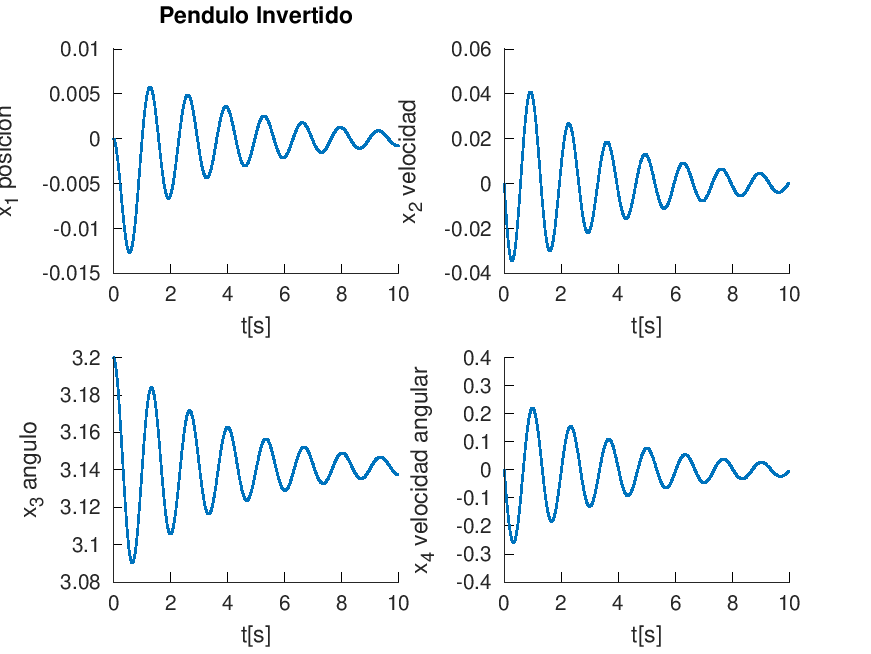

In [14]:
!octave -W punto2.m # -W : no window system
display.Image('punto2.png')

#Punto 5

In [29]:
%%writefile punto5.m
clear all; clc;close all;warning('off','all');
##warning('off','all');
function linea                                      ##
set(findall(gcf,'type','line'), 'linewidth',3);     ##
endfunction


pkg load symbolic %Primera vez que se corre el paquete simbólico de Python.
syms fi fi_p fi_pp p p_p p_pp M m u l F g;
disp('Para el equilibrio inestable')
ang_inic=0;
p_pp=(1/(M+m))*(u-m*l*fi_pp+m*l*fi_p^2*fi-F*p_p); %Pequeños angulos
% fi_pp_=(1/long)*(g*sin(fi)-p_pp*cos(fi));%Expresión completa
% fi_pp=(1/long)*(g*(fi)-p_pp); %Pequeños angulos para fi~0, sin(fi)~fi, cos(fi)~1
fi_pp=solve(fi_pp==(1/l)*(g*fi-p_pp),fi_pp)
%disp('fi_pp='); pretty(simplify(fi_pp));
p_pp=subs(p_pp,'fi_pp',fi_pp);
disp('p_pp='); pretty(simplify(p_pp));

m=1.1;F=1;l=1.2;g=9.8;M=.5;
A=[[0 1 0 0];[0 -F/M -g*m/M 0];[0 0 0 1];[0 -F/M/l -g*(M+m)/M/l 0]];
B=[0;1/M;0;1/M/l];
C=[1 0 0 0;0 0 1 0];
D=0;

u=0;
i=0;
At=0.0001;tF=10;
x0=[0;0;pi;0];
x=[0;0;pi-0.2;0];#Valores iniciales
##x=[0;0;-0.01;0];
##x=[0;0;3.2;0];


for t=0:At:tF
i=i+1;

xp=A*(x-x0)+B*u;
x=x+xp*At;

x1(i)=x(1);%delta
x2(i)=x(2);%delta_p
x3(i)=x(3);%fi
x4(i)=x(4);%fi_p
end

t=0:At:tF;
hfig1 = figure(1); set(hfig1, 'Visible', 'off');
subplot(221);hold on;title('Pendulo Invertido');
xlabel('t[s]');plot(t,x1);linea;ylabel('x_1 posicion');
subplot(222);hold on;plot(t,x2);linea;
title('m = 1.1 ; l = 1.2');
ylabel('x_2 velocidad');xlabel('t[s]');
subplot(223);hold on;plot(t,x3);linea;
ylabel('x_3 angulo');xlabel('t[s]');
subplot(224);hold on;plot(t,x4);linea;
ylabel('x_4 velocidad angular');xlabel('t[s]');
print -dpng punto5.png

Overwriting punto5.m


Symbolic pkg v3.2.1: Python communication link active, SymPy v1.12.
Para el equilibrio inestable
fi_pp = (sym)

                        2                 
  F⋅pₚ + M⋅fi⋅g - fi⋅fiₚ ⋅l⋅m + fi⋅g⋅m - u
  ────────────────────────────────────────
                    M⋅l                   

p_pp=
                2                 
  -F⋅pₚ + fi⋅fiₚ ⋅l⋅m - fi⋅g⋅m + u
  ────────────────────────────────
                 M                



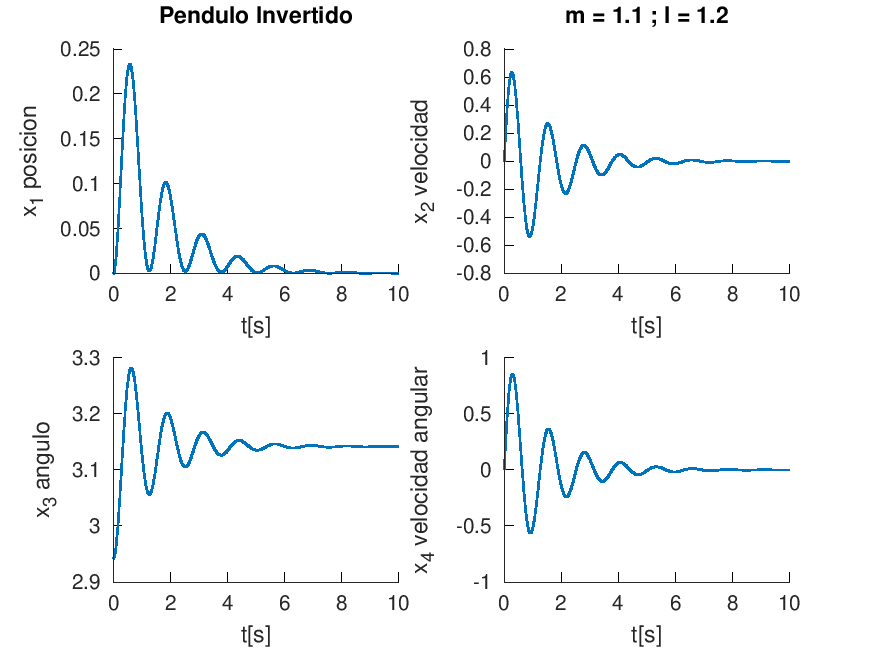

In [30]:
!octave -W punto5.m # -W : no window system
display.Image('punto5.png')

#Punto 6

In [36]:
%%writefile punto6.m
clear all; clc;close all;warning('off','all');
##warning('off','all');
function linea                                      ##
set(findall(gcf,'type','line'), 'linewidth',3);     ##
endfunction


pkg load symbolic %Primera vez que se corre el paquete simbólico de Python.
syms fi fi_p fi_pp p p_p p_pp M m u l F g;
#disp('Para el equilibrio inestable')
ang_inic=0;
p_pp=(1/(M+m))*(u-m*l*fi_pp+m*l*fi_p^2*fi-F*p_p); %Pequeños angulos
% fi_pp_=(1/long)*(g*sin(fi)-p_pp*cos(fi));%Expresión completa
% fi_pp=(1/long)*(g*(fi)-p_pp); %Pequeños angulos para fi~0, sin(fi)~fi, cos(fi)~1
fi_pp=solve(fi_pp==(1/l)*(g*fi-p_pp),fi_pp);
%disp('fi_pp='); pretty(simplify(fi_pp));
p_pp=subs(p_pp,'fi_pp',fi_pp);
#disp('p_pp='); pretty(simplify(p_pp));

m=0.01;F=1;l=1.2;g=9.8;M=.5;
A=[[0 1 0 0];[0 -F/M -g*m/M 0];[0 0 0 1];[0 -F/M/l -g*(M+m)/M/l 0]];
B=[0;1/M;0;1/M/l];
C=[1 0 0 0;0 0 1 0];
D=0;

u=0;
i=0;
At=0.0001;tF=10;
x0=[0;0;pi;0];
x=[0;0;pi-0.2;0];#Valores iniciales
##x=[0;0;-0.01;0];
##x=[0;0;3.2;0];
##x=[0;0;pi;0];


for t=0:At:tF
i=i+1;

xp=A*(x-x0)+B*u;
x=x+xp*At;

x1(i)=x(1);%delta
x2(i)=x(2);%delta_p
x3(i)=x(3);%fi
x4(i)=x(4);%fi_p
end

t=0:At:tF;
hfig1 = figure(1); set(hfig1, 'Visible', 'off');
subplot(221);hold on;title('Pendulo Invertido');
xlabel('t[s]');plot(t,x1);linea;ylabel('x_1 posicion');
subplot(222);hold on;plot(t,x2);linea;
title('m = 0.01 ; l = 1.2');
ylabel('x_2 velocidad');xlabel('t[s]');
subplot(223);hold on;plot(t,x3);linea;
ylabel('x_3 angulo');xlabel('t[s]');
subplot(224);hold on;plot(t,x4);linea;
ylabel('x_4 velocidad angular');xlabel('t[s]');
print -dpng punto6.png

Overwriting punto6.m


Symbolic pkg v3.2.1: Python communication link active, SymPy v1.12.



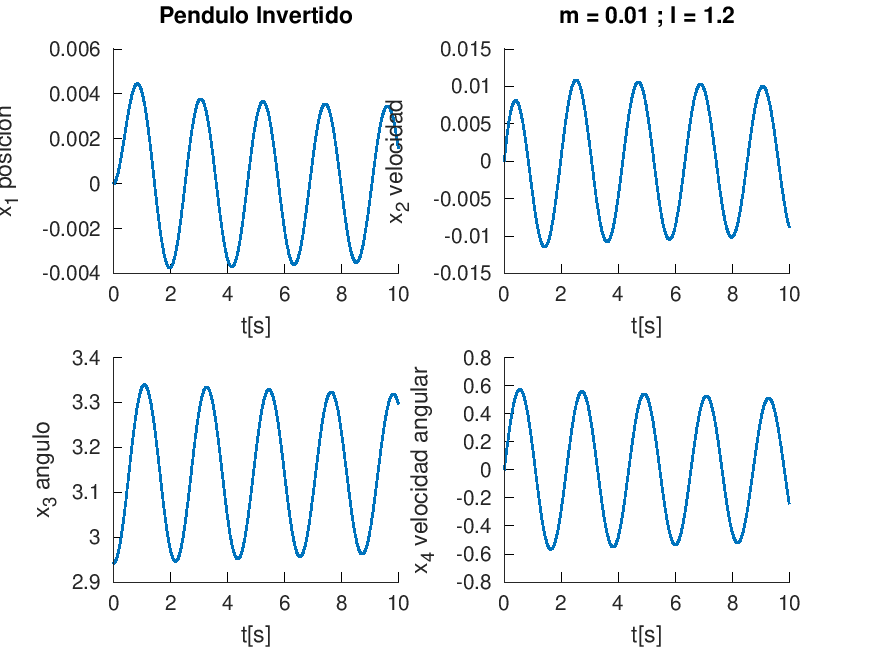

In [37]:
!octave -W punto6.m # -W : no window system
display.Image('punto6.png')